In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\archive (3)\loan_data.csv")

In [3]:
df.head(1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1


In [3]:
numerical_columns=df.select_dtypes(include=["number"]).columns
categorical_columns=df.select_dtypes(include=["object"]).columns

In [5]:
print(numerical_columns)

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


In [6]:
print(categorical_columns)

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


In [7]:
df[numerical_columns].skew()

person_age                     2.548154
person_income                 34.137583
person_emp_exp                 2.594917
loan_amnt                      1.179731
loan_int_rate                  0.213784
loan_percent_income            1.034512
cb_person_cred_hist_length     1.631720
credit_score                  -0.610261
loan_status                    1.336351
dtype: float64

In [4]:
df['person_age'] = np.log1p(df['person_age'])
df['person_income'] = np.log1p(df['person_income'])
df['person_emp_exp'] = np.log1p(df['person_emp_exp'])
df['loan_int_rate'] = np.log1p(df['loan_int_rate'])
df['loan_percent_income']=np.log1p(df['loan_percent_income'])
df['cb_person_cred_hist_length'] = np.log1p(df['cb_person_cred_hist_length'])

In [9]:
df[numerical_columns].skew()

person_age                    1.220204
person_income                 0.224018
person_emp_exp               -0.122990
loan_amnt                     1.179731
loan_int_rate                -0.323221
loan_percent_income           0.829301
cb_person_cred_hist_length    0.442656
credit_score                 -0.610261
loan_status                   1.336351
dtype: float64

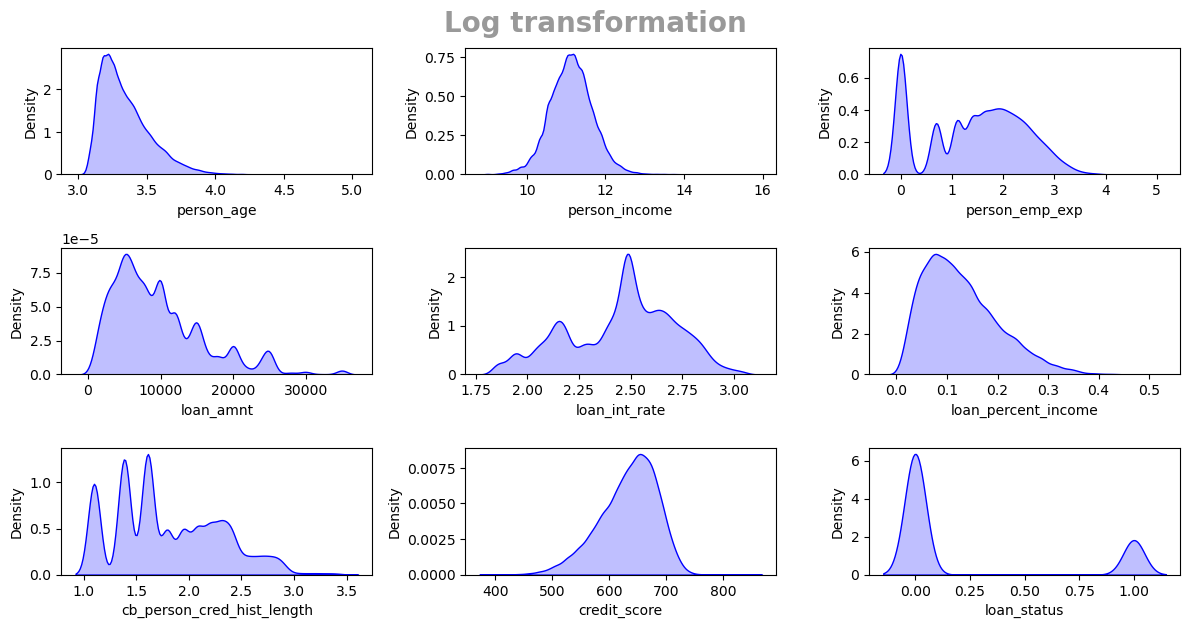

In [10]:
plt.figure(figsize=(12, 10))
plt.suptitle('Log transformation', fontsize=20, fontweight='bold', alpha=0.4)

for i in range(0, len(numerical_columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='b')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()
    

plt.savefig('Log transformation.png')

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                     'credit_score']
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 
                       'loan_intent', 'previous_loan_defaults_on_file']
target = 'loan_status'

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( transformers=[
        ("OneHotEncoder", ohe_transformer, categorical_columns),
        ("StandardScaler", numeric_transformer, numerical_columns),
    ]
)

x = preprocessor.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((36000, 27), (9000, 27))

Text(0.5, 1.0, 'corr matrix')

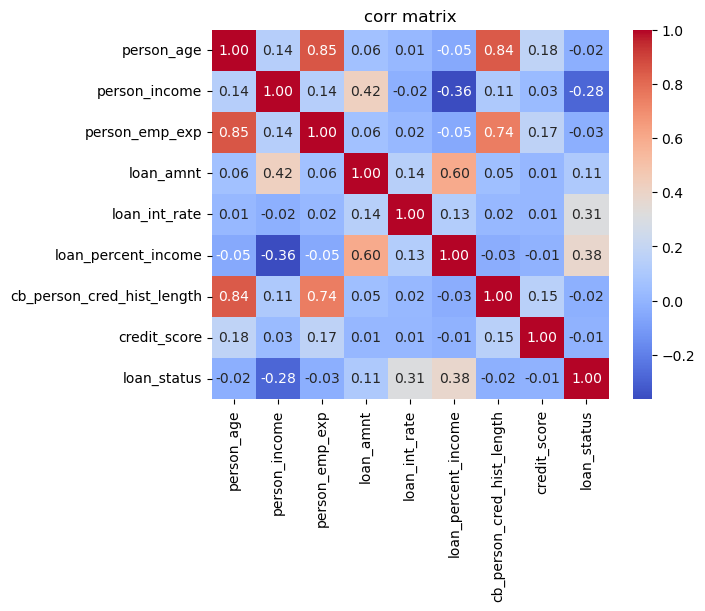

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("corr matrix")

In [11]:
print(y_train.value_counts())


loan_status
0    28010
1     7990
Name: count, dtype: int64


In [12]:
class_proportions = y_train.value_counts(normalize=True)
print(class_proportions)


loan_status
0    0.778056
1    0.221944
Name: proportion, dtype: float64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from xgboost import XGBClassifier


logreg_model = LogisticRegression(random_state=42,class_weight='balanced')
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
dt_model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
xgb_model = XGBClassifier(random_state=42)

models = [("Logistic Regression", logreg_model), 
          ("Random Forest", rf_model), 
          ("Decision Tree", dt_model), 
          ("XGBoost", xgb_model)]

for model_name, model in models:
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print("-" * 50) 


Results for Logistic Regression:
Accuracy: 0.8551111111111112
ROC AUC: 0.8773044648004612
Confusion Matrix:
[[5852 1138]
 [ 166 1844]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.62      0.92      0.74      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.82      9000
weighted avg       0.89      0.86      0.86      9000

--------------------------------------------------
Results for Random Forest:
Accuracy: 0.9285555555555556
ROC AUC: 0.870532530480644
Confusion Matrix:
[[6818  172]
 [ 471 1539]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.95      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.

In [8]:
from sklearn.model_selection import GridSearchCV

In [25]:
xgb_model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters: ", best_params)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [22]:
xgb_model = XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 300,scale_pos_weight=0.778056/  0.221944)
xgb_model.fit(x_train,y_train)

y_pred=xgb_model.predict(x_test)
y_pred_proba=xgb_model.predict_proba(x_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
    
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9225555555555556
ROC AUC: 0.9788279631883501
Confusion Matrix:
[[6525  465]
 [ 232 1778]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6990
           1       0.79      0.88      0.84      2010

    accuracy                           0.92      9000
   macro avg       0.88      0.91      0.89      9000
weighted avg       0.93      0.92      0.92      9000



In [26]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(rf_model, param_grid, cv=5,scoring='roc_auc')

grid_search_dt.fit(x_train, y_train)

print("Best Parameters:", grid_search_dt.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}


In [27]:
rf_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_split= 5)
rf_model.fit(x_train,y_train)

y_pred=dt_model.predict(x_test)
y_pred_proba=dt_model.predict_proba(x_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
    
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.92
ROC AUC: 0.9629422985216975
Confusion Matrix:
[[6803  187]
 [ 533 1477]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.89      0.73      0.80      2010

    accuracy                           0.92      9000
   macro avg       0.91      0.85      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [33]:
import pickle
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler have been saved as pickle files.")

with open('xgboost_model.pkl', 'rb') as model_file:
    loaded_xgb_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)    
    


Model and scaler have been saved as pickle files.
